In [31]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import csv

In [20]:
tf.__version__

'2.10.0'

In [21]:
a = tf.Variable(5.0)
b = tf.Variable(7.0)
tf.add(a,b)

<tf.Tensor: shape=(), dtype=float32, numpy=12.0>

In [47]:
df = pd.read_csv(r"C:\Users\piotr\Desktop\Kurs DeepLearning\Housing.csv")


In [48]:
type(df)

pandas.core.frame.DataFrame

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [51]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [53]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [55]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [56]:
df.tail(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
535,2100000,3360,2,1,1,yes,no,no,no,no,1,no,unfurnished
536,1960000,3420,5,1,2,no,no,no,no,no,0,no,unfurnished
537,1890000,1700,3,1,2,yes,no,no,no,no,0,no,unfurnished
538,1890000,3649,2,1,1,yes,no,no,no,no,0,no,unfurnished
539,1855000,2990,2,1,1,no,no,no,no,no,1,no,unfurnished
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [57]:
df.iloc[1][2]

4

In [59]:
df.loc[3:9]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [60]:
df.keys()

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [61]:
df['area']

0      7420
1      8960
2      9960
3      7500
4      7420
       ... 
540    3000
541    2400
542    3620
543    2910
544    3850
Name: area, Length: 545, dtype: int64

In [65]:
df[['area', 'stories', 'parking']]

,area,stories,parking
0,7420,3,2
1,8960,4,3
2,9960,2,2
3,7500,2,3
4,7420,2,2
...,...,...,...
540,3000,1,2
541,2400,1,0
542,3620,1,0
543,2910,1,0


In [66]:
df['area']>5000

0       True
1       True
2       True
3       True
4       True
       ...  
540    False
541    False
542    False
543    False
544    False
Name: area, Length: 545, dtype: bool

In [67]:
df[df['area']>5000]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,2870000,5400,4,1,2,yes,no,no,no,no,0,no,unfurnished
488,2852500,5200,4,1,3,yes,no,no,no,no,0,no,unfurnished
494,2730000,6800,2,1,1,yes,no,no,no,no,0,no,unfurnished
520,2450000,7700,2,1,1,yes,no,no,no,no,0,no,unfurnished


In [68]:
df[
    (df['area']>5000) &\
    (df['bathrooms']==3) &\
    (df['basement']=='yes')
]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
11,9681000,6000,4,3,2,yes,yes,yes,yes,no,2,no,semi-furnished
33,8190000,5960,3,3,2,yes,yes,yes,no,no,1,no,unfurnished


In [69]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [70]:
df.sum()

price                                                      2597867440
area                                                          2807045
bedrooms                                                         1616
bathrooms                                                         701
stories                                                           984
mainroad            yesyesyesyesyesyesyesyesyesyesyesyesyesyesyesy...
guestroom           nonononoyesnononoyesyesnoyesnonononoyesnoyesno...
basement            nonoyesyesyesyesnonoyesnoyesyesnononoyesyesnon...
hotwaterheating     nononononononononononoyesnoyesnonononononoyesn...
airconditioning     yesyesnoyesyesyesyesnoyesyesyesnoyesnononoyesy...
parking                                                           378
prefarea            yesnoyesyesnoyesyesnoyesyesyesnoyesnoyesnoyesn...
furnishingstatus    furnishedfurnishedsemi-furnishedfurnishedfurni...
dtype: object

In [71]:
df['area'].mean()

5150.54128440367

In [72]:
df.count()

price               545
area                545
bedrooms            545
bathrooms           545
stories             545
mainroad            545
guestroom           545
basement            545
hotwaterheating     545
airconditioning     545
parking             545
prefarea            545
furnishingstatus    545
dtype: int64

In [73]:
df.corr()

C:\Users\piotr\AppData\Local\Temp\ipykernel_29592\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


In [75]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [76]:
np.array([1,2,3,4,5])

array([1, 2, 3, 4, 5])

In [78]:
tmp_arr =np.array([1,2,3,4,5])
type(tmp_arr)

numpy.ndarray

In [79]:
tmp_arr.dtype

dtype('int32')

In [80]:
np.array([1,2,3,'siema'])

array(['1', '2', '3', 'siema'], dtype='<U11')

In [81]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [82]:
np.arange(5,20,2)

array([ 5,  7,  9, 11, 13, 15, 17, 19])

In [83]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [84]:
np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [85]:
np.ones(10)*4

array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4.])

In [88]:
tmp_arr = np.array([[1,2,3], [4,5,6]])
tmp_arr

array([[1, 2, 3],
       [4, 5, 6]])

In [90]:
print(tmp_arr)

[[1 2 3]
 [4 5 6]]


In [91]:
tmp_arr.dtype

dtype('int32')

In [92]:
tmp_arr.shape

(2, 3)

In [93]:
tmp_arr.ndim

2

In [94]:
tmp_arr.size

6

In [95]:
tmp_arr = np.array([1,np.nan, 3])
tmp_arr

array([ 1., nan,  3.])

In [96]:
np.isnan(tmp_arr)

array([False,  True, False])

In [97]:
np.where(
    np.isnan(tmp_arr)
)

(array([1], dtype=int64),)

In [98]:
np.unique(
    np.array(
        ['jeden', 'dwa', 'try', 'dwa', 'trzy']
    ),
    return_counts=True
)

(array(['dwa', 'jeden', 'try', 'trzy'], dtype='<U5'),
 array([2, 1, 1, 1], dtype=int64))

In [99]:
tmp_arr = np.arange(27)

In [100]:
tmp_arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

In [101]:
tmp_arr.shape

(27,)

In [102]:
tmp_arr.reshape((9,3))

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14],
       [15, 16, 17],
       [18, 19, 20],
       [21, 22, 23],
       [24, 25, 26]])

In [103]:
np.reshape(
    a=tmp_arr,
    newshape=(3,3,3)
)

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

In [104]:
tmp_arr = np.reshape(
    a=tmp_arr,
    newshape=(3,3,3)
)

In [105]:
tmp_arr[:2,:,1:]

array([[[ 1,  2],
        [ 4,  5],
        [ 7,  8]],

       [[10, 11],
        [13, 14],
        [16, 17]]])

In [106]:
np.zeros(10) + 5

array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5.])

In [108]:
np.arange(10) + np.ones(10)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [109]:
np.random.rand(10)

array([0.20889944, 0.06148844, 0.69173797, 0.49864876, 0.09271674,
       0.1921995 , 0.12584445, 0.38887422, 0.82189939, 0.12496674])

In [111]:
np.random.randint(2, 10, 4)

array([2, 8, 5, 7])

In [113]:
np.array([1,2,3]).astype(np.float32)

array([1., 2., 3.], dtype=float32)

In [115]:
tmp_arr = np.arange(5,25)
print(
    tmp_arr.max(),'\n',
    tmp_arr.min(),'\n',
    tmp_arr.mean(),'\n',
    np.median(tmp_arr),'\n',
    tmp_arr.std()
)

24 
 5 
 14.5 
 14.5 
 5.766281297335398


In [116]:
np.random.rand(10) > 0.5

array([False,  True,  True,  True,  True, False,  True, False, False,
        True])

In [117]:
tmp_arr = np.random.rand(10)
tmp_arr

array([0.87198057, 0.21138285, 0.71828966, 0.79850419, 0.17024362,
       0.59266917, 0.58022426, 0.6442783 , 0.28814182, 0.04468266])

In [118]:
(tmp_arr > 0.4) & (tmp_arr < 0.6)

array([False, False, False, False, False,  True,  True, False, False,
       False])

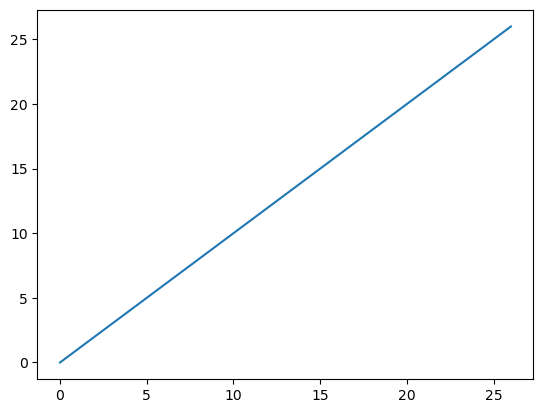

In [119]:
tmp_arr = np.arange(27)
plt.plot(tmp_arr)
plt.show()

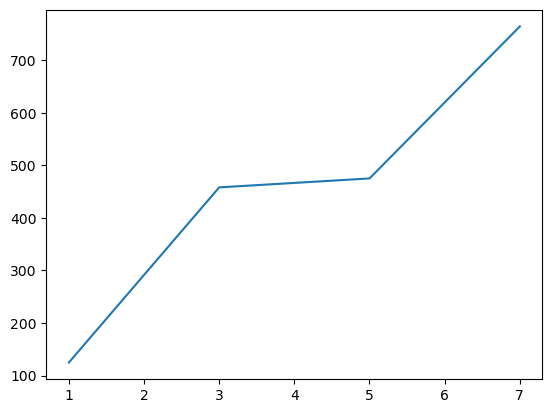

In [120]:
tmp_x = np.array([1,3,5,7])
tmp_y = np.array([125, 458, 475, 764])

plt.plot(tmp_x, tmp_y)
plt.show()

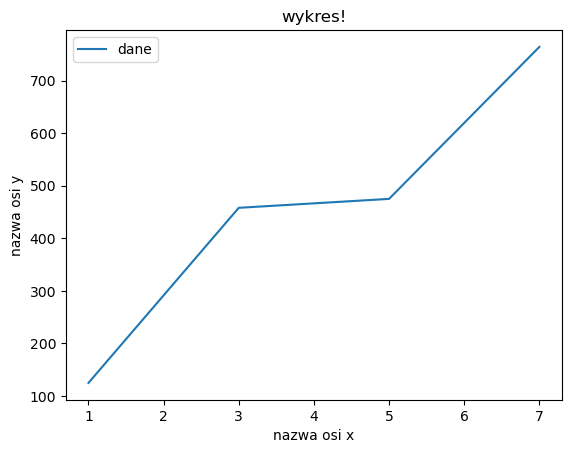

In [121]:
plt.plot(tmp_x, tmp_y)

plt.xlabel('nazwa osi x')
plt.ylabel('nazwa osi y')

plt.legend(['dane'])

plt.title('wykres!')

plt.show()

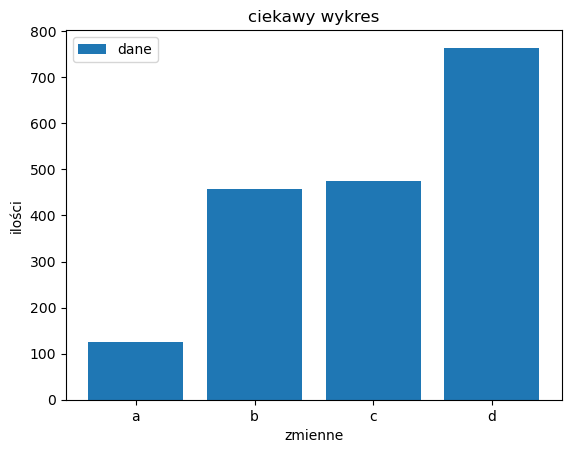

In [124]:
plt.bar(
    x=['a', 'b', 'c', 'd'],
    height=tmp_y
)

plt.xlabel('zmienne')
plt.ylabel('ilości')

plt.legend(['dane'])

plt.title('ciekawy wykres')

plt.show()

In [125]:
n= 10
tmp_x = np.arange(0,n,0.1)
tmp_y = np.sin(tmp_x)

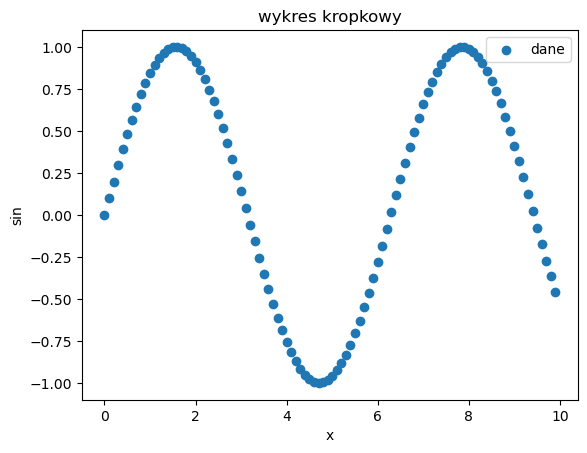

In [126]:
plt.scatter(
    x=tmp_x,
    y=tmp_y
)

plt.xlabel('x')
plt.ylabel('sin')

plt.legend(['dane'])

plt.title('wykres kropkowy')

plt.show()

In [127]:
tmp_normal = np.random.normal(size=(1000)

plt.hist(
    x=tmp_normal,
    bins=10
)

plt.xlabel('x')
plt.ylabel('ilość')

plt.legend(['dane'])

plt.title('histogram')

plt.show()

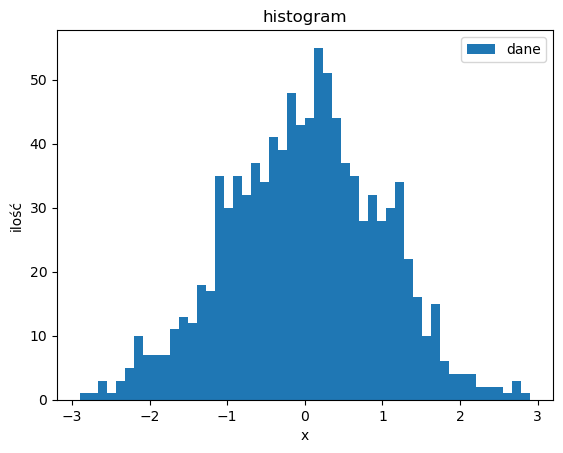

In [129]:
plt.hist( 
    x=tmp_normal, 
    bins=50 
)

plt.xlabel('x') 
plt.ylabel('ilość')

plt.legend(['dane'])

plt.title('histogram')

plt.show()

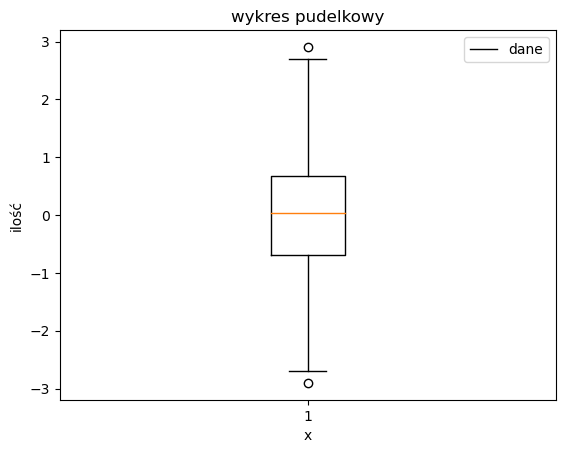

In [132]:
plt.boxplot(
    x=tmp_normal 
)

plt.xlabel('x') 
plt.ylabel('ilość')

plt.legend(['dane'])

plt.title('wykres pudelkowy')

plt.show()


In [135]:
tmp_x = np.arange(30)
tmp_y_0 = tmp_x
tmp_y_1 = tmp_x + np.random.rand(*tmp_x.shape)
tmp_y_2 = np.flip(tmp_x)



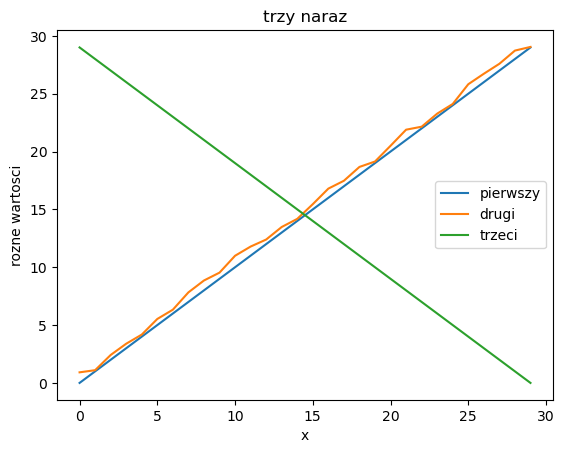

In [137]:
plt.plot(tmp_x, tmp_y_0)
plt.plot(tmp_x, tmp_y_1)
plt.plot(tmp_x, tmp_y_2)

plt.xlabel('x') 
plt.ylabel('rozne wartosci')

plt.legend(['pierwszy', 'drugi', 'trzeci'])

plt.title('trzy naraz')

plt.show()

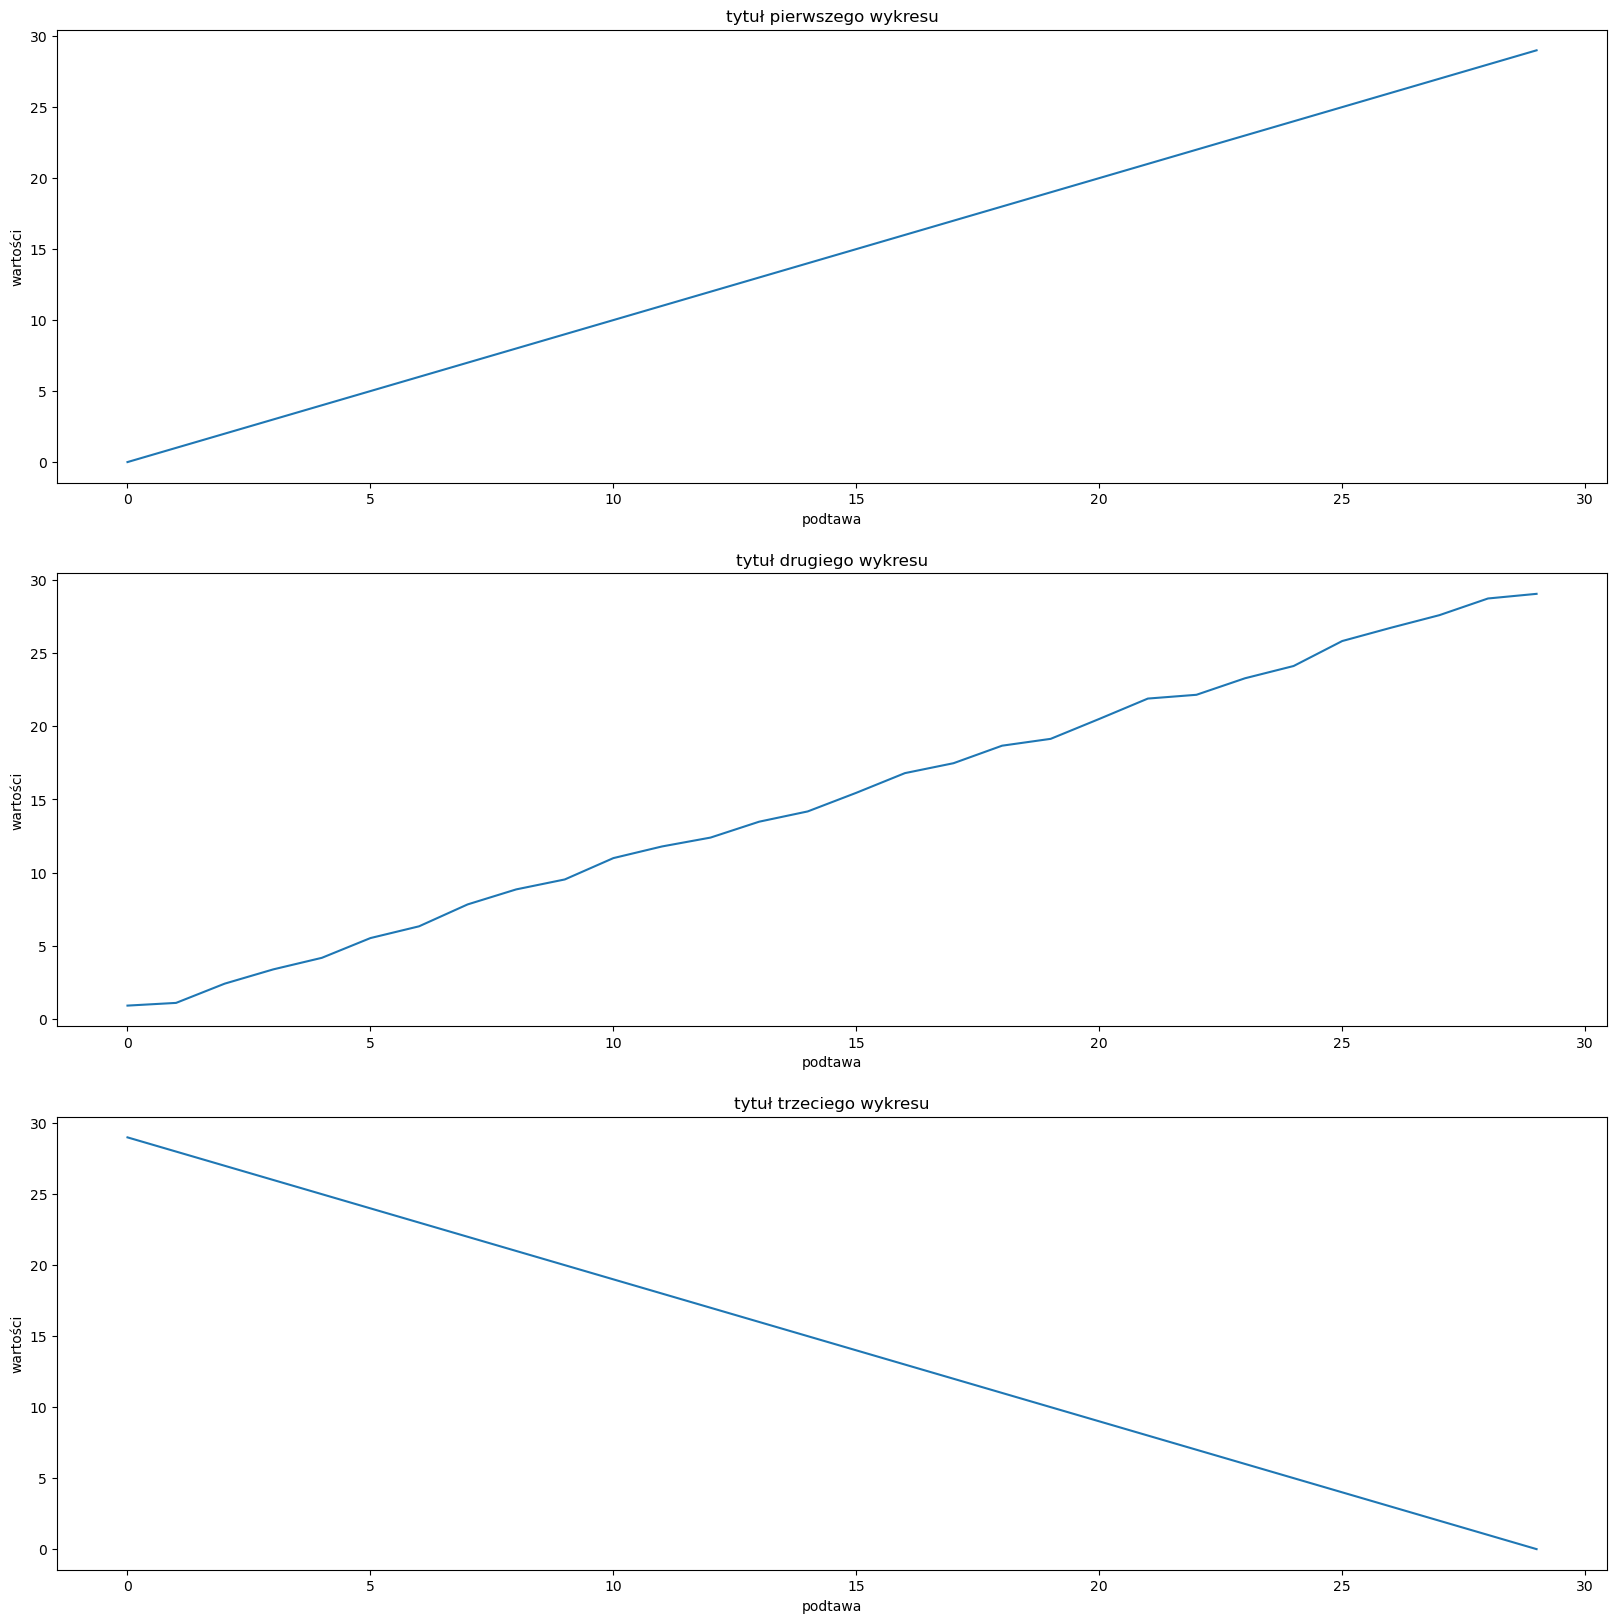

In [138]:
fig, ax =plt.subplots(
    nrows=3,
    ncols=1,
    figsize=(20,20)
)

ax[0].plot(tmp_x, tmp_y_0)
ax[0].set_xlabel('podtawa')
ax[0].set_ylabel('wartości')
ax[0].set_title('tytuł pierwszego wykresu')

ax[1].plot(tmp_x, tmp_y_1)
ax[1].set_xlabel('podtawa')
ax[1].set_ylabel('wartości')
ax[1].set_title('tytuł drugiego wykresu')

ax[2].plot(tmp_x, tmp_y_2)
ax[2].set_xlabel('podtawa')
ax[2].set_ylabel('wartości')
ax[2].set_title('tytuł trzeciego wykresu')

plt.show()


In [139]:
from sklearn.datasets import make_blobs

In [140]:
X, y = make_blobs(
    n_samples=1000,
    centers=5,
    n_features=10
)

In [141]:
X.shape

(1000, 10)

In [142]:
y.shape

(1000,)

In [143]:
y[:10]

array([4, 2, 2, 1, 4, 3, 0, 3, 3, 2])

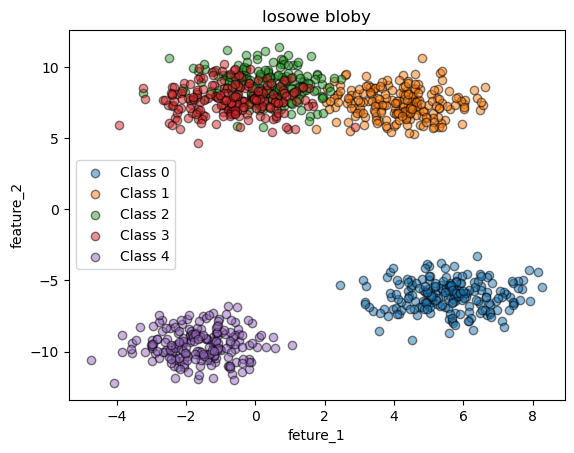

In [146]:
for one_y in np.unique(y):
    choosen_X = X[y==one_y]
    plt.scatter(
        choosen_X[:, 0],
        choosen_X[:, 1],
        alpha=0.5,
        edgecolor='k',
        label='Class %s'%one_y
    )
    
plt.legend()
plt.xlabel('feture_1')
plt.ylabel('feature_2')
plt.title('losowe bloby')
plt.show()

In [147]:
from sklearn.datasets import make_circles

In [150]:
X, y = make_circles(
    n_samples=1000,
    noise=0.2,
    factor=0.05
    
)

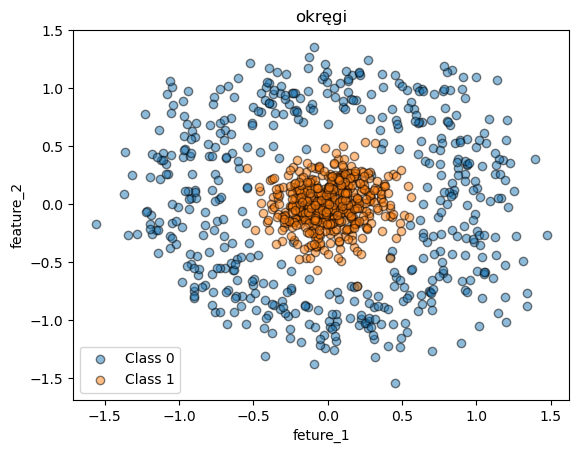

In [151]:
for one_y in np.unique(y):
    choosen_X = X[y==one_y]
    plt.scatter(
        choosen_X[:, 0],
        choosen_X[:, 1],
        alpha=0.5,
        edgecolor='k',
        label='Class %s'%one_y
    )
    
plt.legend()
plt.xlabel('feture_1')
plt.ylabel('feature_2')
plt.title('okręgi')
plt.show()

In [152]:
from sklearn.datasets import make_regression

In [153]:
X, y = make_regression(
    n_samples=1000,
    n_features=8
)

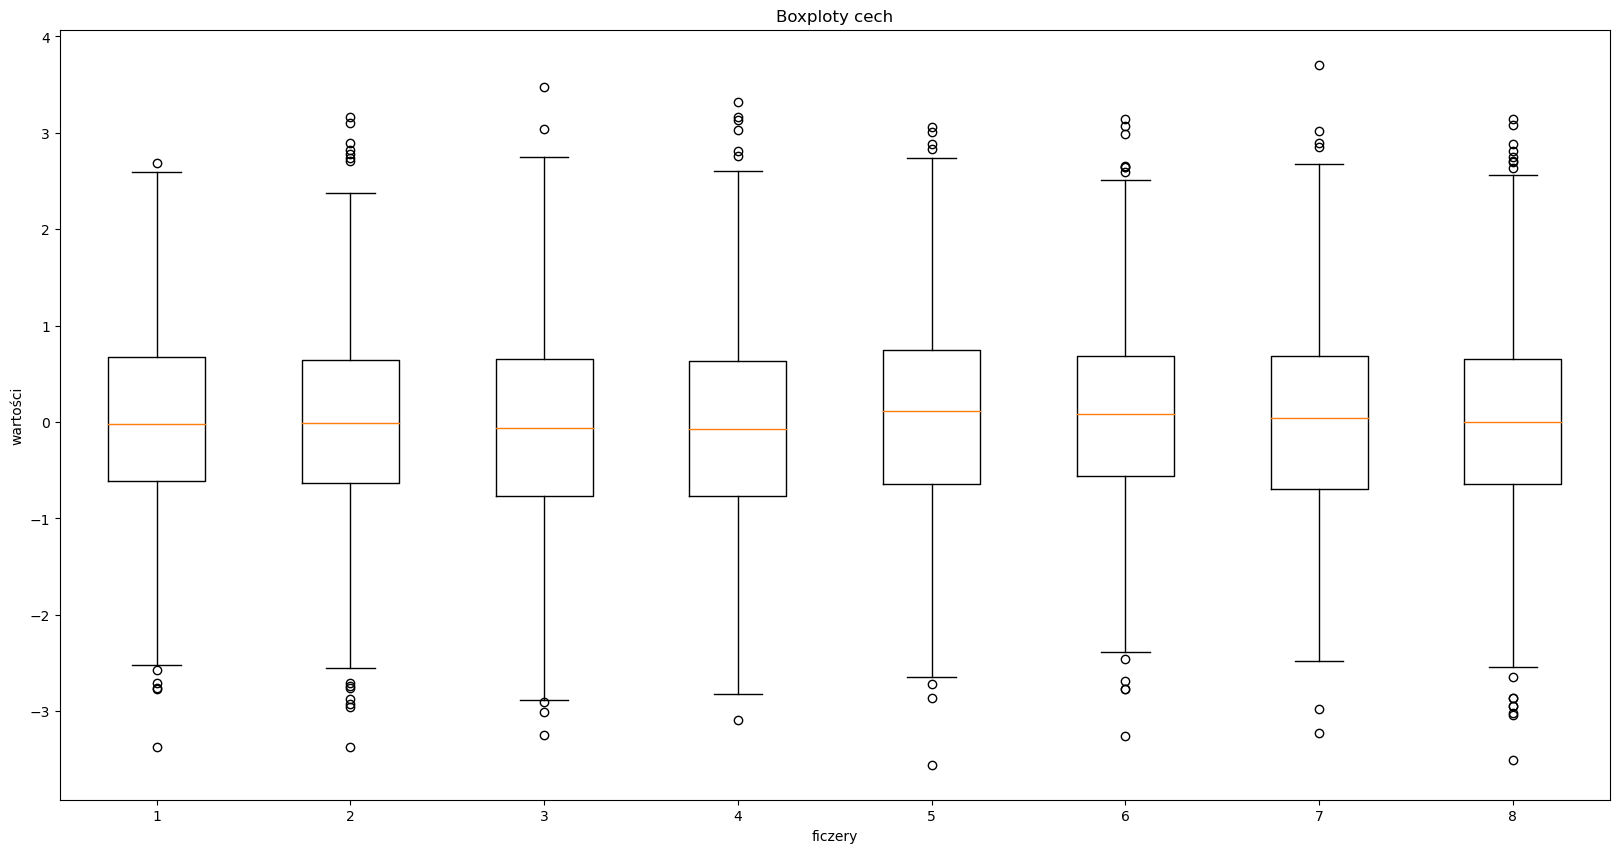

In [157]:
fig = plt.figure(figsize=(20,10))
plt.boxplot(X)

plt.xlabel('ficzery')
plt.ylabel('wartości')

plt.title('Boxploty cech')

plt.show()

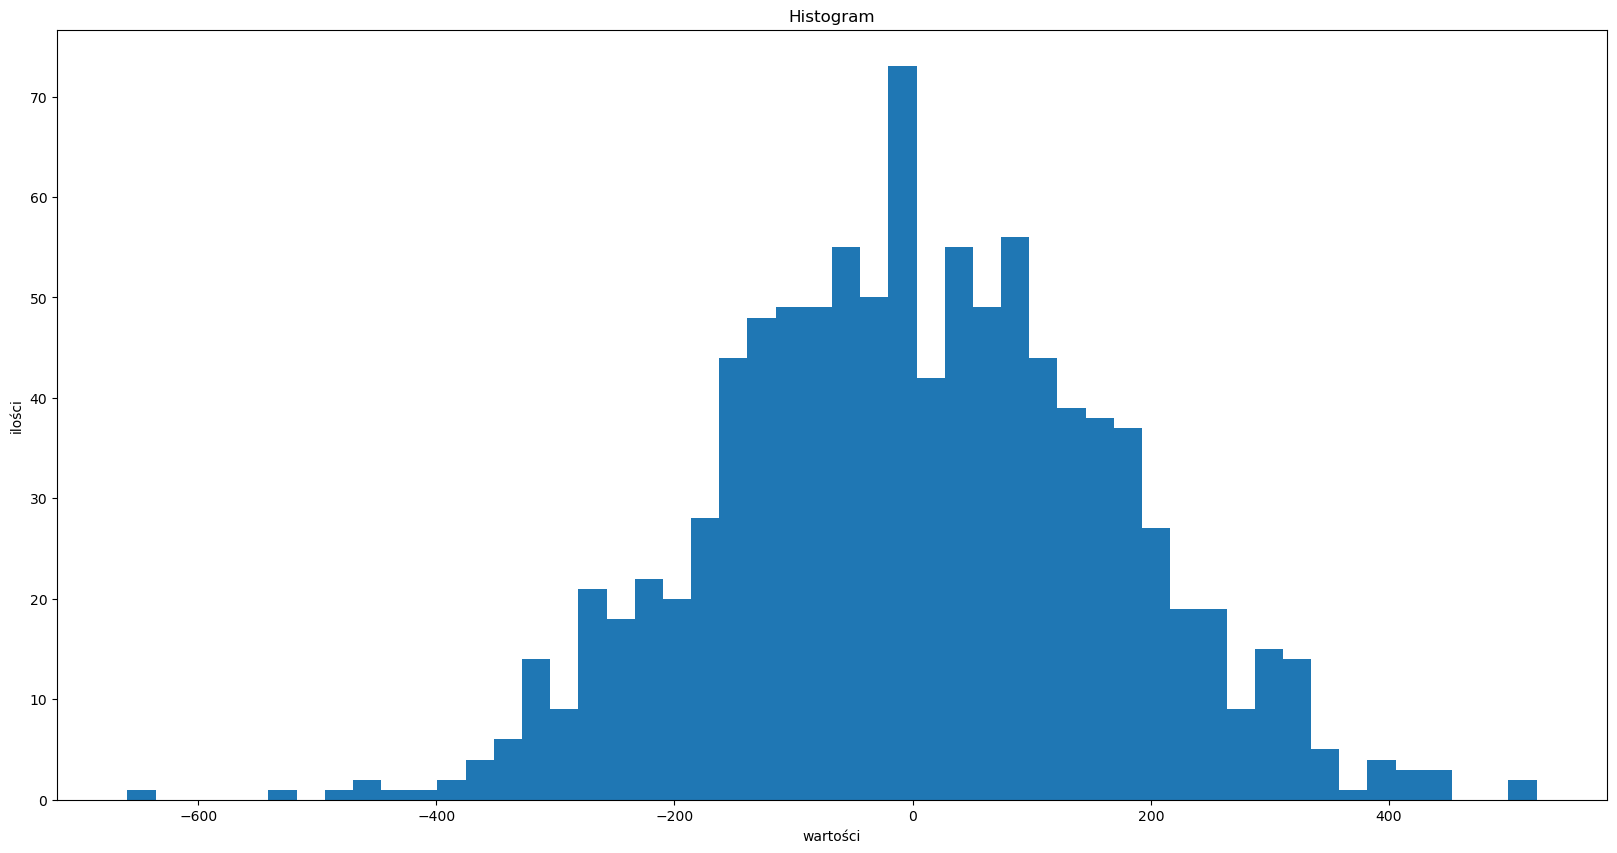

In [158]:
fig = plt.figure(figsize=(20,10))
plt.hist(y, bins=50)

plt.xlabel('wartości')
plt.ylabel('ilości')

plt.title('Histogram')

plt.show()

In [159]:
# normalizacja


In [161]:
from sklearn.preprocessing import MinMaxScaler

In [162]:
scaler = MinMaxScaler()

In [164]:
scaler = scaler.fit(X)

In [165]:
X_normalizer = scaler.transform(X)

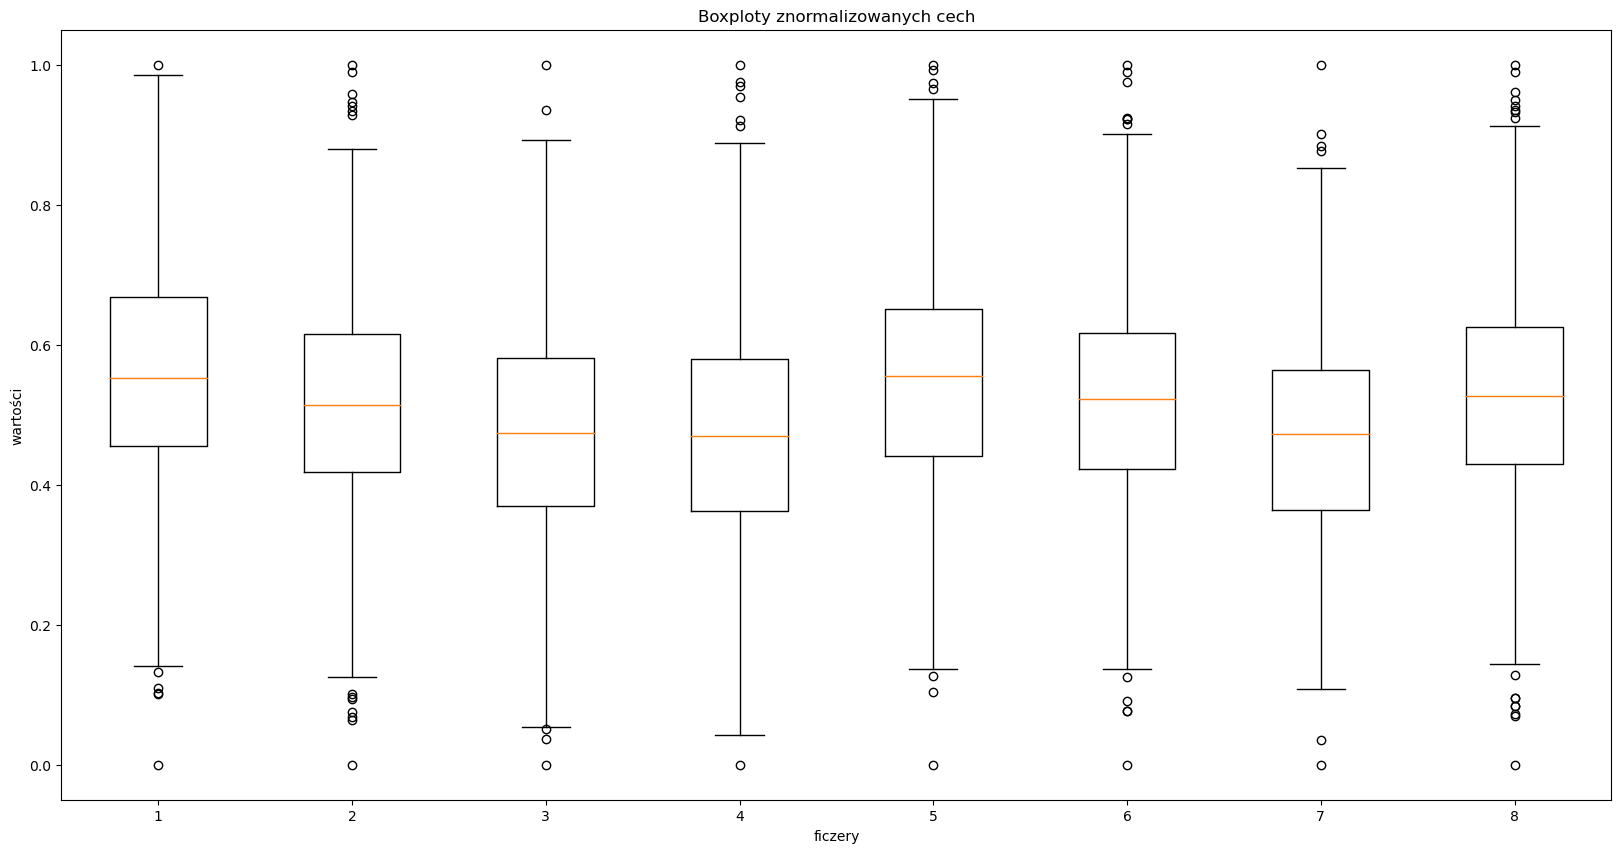

In [166]:
fig = plt.figure(figsize=(20,10))
plt.boxplot(X_normalizer)

plt.xlabel('ficzery')
plt.ylabel('wartości')

plt.title('Boxploty znormalizowanych cech')

plt.show()

In [167]:
#kodowanie katregori

In [168]:
tmp_caregorical_arr = np.array(
    ['pies', 'kot', 'baran', 'kot', 'pies', 'kot', 'baran']
)

In [169]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [171]:
le = LabelEncoder()
le = le.fit(tmp_caregorical_arr)
tmp_caregorical_arr_coded = le.transform(tmp_caregorical_arr)
tmp_caregorical_arr_coded

array([2, 1, 0, 1, 2, 1, 0])

In [173]:
ohe = OneHotEncoder(sparse=False)
ohe = ohe.fit(tmp_caregorical_arr_coded.reshape(-1, 1))

C:\Users\piotr\anaconda3\envs\isadl\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [174]:
ohe.transform(tmp_caregorical_arr_coded.reshape(-1, 1))

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [175]:
ohe.categories_

[array([0, 1, 2])]